TBD:
2. GET AN ERRO MATRIX AND A CORRELATION MATRIX

# Polynomial Polyfit
## What are we looking for:
In this notebook we are calculating the Generalized Least Squared Method in a useful scenario: **Fitting a cloud of Points in 3 Dimenssions to a 3d-Polynomial-Surfaces**. <br>
This would allowing us to syntehtise **Analyitical Expressions** which approach measures with 2 input argumenta  to linear functions with shaped to: <br>
${f: \mathbb{R}^2 \rightarrow \mathbb{R}}$<br><br>
### Output function
Specifically, we are getting polynomial surfaces of degree $m_1, m_2$ for each of their independant variables. In other words,   will shape:<br>
${f(x_1,x_2) = \beta_{00} + \beta_{10}·x_1 + \beta_{11}·x_1·x_2 + \beta_{21}·x_1^2·x_2 + ... \beta_{m_1m_2}·x_1^{m_1}·x_2^{m_2}}$ <br>

Objective expression in Matricial Form:
${ \quad
    y = 
    {\begin{bmatrix}1&x_{1}&x_{1}^{2}&\dots &x_{1}^{m_1}\end{bmatrix}}
    {\begin{bmatrix}\beta _{00}&\beta _{01}&\dots&\beta _{0m_2}\\\beta _{10}\\\beta _{20}&&\ddots\\\vdots \\\beta_{m_{1}0}&&&\beta_{m_{1}m_{2}}\end{bmatrix}}
    {\begin{bmatrix}1\\x_{2}\\x_{2}^{2}\\\vdots \\x_{2}^{m_2}\end{bmatrix}}
}$  <br><br>
${
    \begin{equation} \tag{1.1} \ Y = \vec{X_1} · \vec{\beta} · \vec{X_2}^T  \quad\quad\quad\quad\quad\quad \end{equation} 
}$

**IMPORTANT - Notation difference in Input/Output data**: 
- **Output data - Polynomial Matrix Shape**: Independant variables separated at both sides of ${\vec{\beta}}$ matrix.
  - $Y \quad$ collection of all Y scalars, through all meshgrid composed by all combinations of ${\vec{X_1}}$ and ${\vec{X_2}}$ contained in fitting surface.
  - $\vec{X_i} \quad$ refers to each collection of X vector, which components are the scalar to be powered from 0 to the maximum degree. It represents the input variables of our function, or independent variables,
  - $\beta \quad$ matrix of polynomial coefficients wich coincide as the result of the least square fit. $\beta_{00}$ is the polynomial indepent term (or surface independte term).<br>
<br><br>
- **Input data - Least Square Shape**: 0
  - $Y \quad$ collection of all Y scalars **measured** through all meshgrid composed by **reachable** combinations of ${\vec{X_1}}$ and ${\vec{X_2}}$ near of the fitting surface. Each row represents a sample.
  - $\vec{X} \quad$ refers to the combination of all product of independant variables. Stacking indepentant variables in this way allow as to simplify ${\beta}$ solution. Each row represents a sample.
  - $\beta \quad$ column vector built to simplify solution of least squares. <br>
  
${ \quad\quad\quad\quad
{\begin{bmatrix}y_1\\y_{2}\\y_{3}\\\vdots \\y_k\end{bmatrix}} = 
{\begin{bmatrix}
1&x_{2}&\dots &x_{2}^{m_2}&x_{1}&\dots&x_{1}x_{2}^{m_{2}}&\dots&\dots&x_{1}^{m_{1}}x_{2}^{m_{2}}\\
1&x_{2}&\dots &x_{2}^{m_2}&x_{1}&\dots&x_{1}x_{2}^{m_{2}}&\dots&\dots&x_{1}^{m_{1}}x_{2}^{m_{2}}\\
1&x_{2}&\dots &x_{2}^{m_2}&x_{1}&\dots&x_{1}x_{2}^{m_{2}}&\dots&\dots&x_{1}^{m_{1}}x_{2}^{m_{2}}\\
\vdots\\
1&x_{2}&\dots &x_{2}^{m_2}&x_{1}&\dots&x_{1}x_{2}^{m_{2}}&\dots&\dots&x_{1}^{m_{1}}x_{2}^{m_{2}}\\
\end{bmatrix}}
{\begin{bmatrix} \beta_{00}\\\beta_{01}\\\vdots \\\beta_{0m_2}\\\beta_{10}\\\vdots\\\beta_{1m_2}\\\vdots\\\beta_{m_{1}m_{2}}\end{bmatrix}}
}$

<br><br>


### Solution
Right now only Ordinary Least Squares is developed: ${\displaystyle {\widehat {\beta }}_{\text{OLS}}=(X^{\operatorname {T} }X)^{-1}X^{\operatorname {T} }y}$

This equation is easy to solve if **INPUT DATA** matrix form is used.

In image below we can compare the input data (green points) and the polynomial-surface-fit we get with next method (blue surface). <br>
![](2dSurPolyfit_probe.JPG)
<br><br>






## Theoretical Frame: [Generalized Least Sqaures](https://en.wikipedia.org/wiki/Generalized_least_squares)

The response values are placed in a vector,
${\displaystyle \mathbf {y} \equiv {\begin{pmatrix}y_{1}\\\vdots \\y_{n}\end{pmatrix}},}$
and the predictor values are placed in the design matrix,
${\displaystyle \mathbf {X} \equiv {\begin{pmatrix}1&x_{12}&x_{13}&\cdots &x_{1k}\\1&x_{22}&x_{23}&\cdots &x_{2k}\\\vdots &\vdots &\vdots &\ddots &\vdots \\1&x_{n2}&x_{n3}&\cdots &x_{nk}\end{pmatrix}},}$
where each row is a vector of the ${\displaystyle k}$ predictor variables

The model assumes that the conditional mean of ${\displaystyle \mathbf {y} }$ given ${\displaystyle \mathbf {X} }$ to be a linear function of ${\displaystyle \mathbf {X} }$ and that the conditional variance of the error term given ${\displaystyle \mathbf {X} }$ is a known non-singular covariance matrix, ${\displaystyle \mathbf {\Omega } }$. That is,
<br>
${\displaystyle \mathbf {y} =\mathbf {X} {\boldsymbol {\beta }}+{\boldsymbol {\varepsilon }}}$
<br>
Where:
  - ${\quad\displaystyle {\boldsymbol {\beta }}\in \mathbb {R} ^{k}\quad}$ is a vector of unknown constants, called “regression coefficients”, which are estimated from the data. 
  - ${\quad \operatorname {E} [{\boldsymbol {\varepsilon }}\mid \mathbf {X} ]=0,\quad \operatorname {Cov} [{\boldsymbol {\varepsilon }}\mid \mathbf {X} ]={\boldsymbol {\Omega }},}$  
<br><br>
The purpose of least square is to find ${\vec{\beta}}$ wich minimizes the argument betweeen measurements and fitting output:

${\displaystyle {{\hat {\boldsymbol {\beta }}} = {\underset {\mathbf {b} }{\operatorname {argmin} }}\,(\mathbf {y} -\mathbf {X} \mathbf {b} )^{\mathrm {T} }\mathbf {\Omega } ^{-1}(\mathbf {y} -\mathbf {X} \mathbf {b} )}}$
<br>
So the estimator is:
${\displaystyle {\hat {\boldsymbol {\beta }}}=\left(\mathbf {X} ^{\mathrm {T} }\mathbf {\Omega } ^{-1}\mathbf {X} \right)^{-1}\mathbf {X} ^{\mathrm {T} }\mathbf {\Omega } ^{-1}\mathbf {y} .}$<br>
The quantity ${\displaystyle \mathbf {\Omega } ^{-1}}$ is known as the precision matrix (or dispersion matrix), a generalization of the diagonal weight matrix. 

Looking for the [method](https://en.wikipedia.org/wiki/Generalized_least_squares#Feasible_generalized_least_squares) to reach a solution in easy step, the method is splitted in 2 steps:
1. Estimate ${\beta}$ by Ordinary Least Squares: ${\displaystyle {\widehat {\beta }}_{\text{OLS}}=(X^{\operatorname {T} }X)^{-1}X^{\operatorname {T} }y}$
<br>
Then estimates the residuals ${\displaystyle {\widehat {u}}_{j}=(Y-X{\widehat {\beta }}_{\text{OLS}})_{j}}$. For simplicity, consider the model for heteroscedastic and non-autocorrelated errors. Assume that the variance-covariance matrix ${\displaystyle \Omega }$ of the error vector is diagonal, or equivalently that errors from distinct observations are uncorrelated. Then each diagonal entry may be estimated by the fitted residuals ${\displaystyle {\widehat {u}}_{j}} so Ω ^ O L S {\displaystyle {\widehat {\Omega }}_{OLS}}$ may be constructed by:    ${\displaystyle {\widehat {\Omega }}_{\text{OLS}}=\operatorname {diag} ({\widehat {\sigma }}_{1}^{2},{\widehat {\sigma }}_{2}^{2},\dots ,{\widehat {\sigma }}_{n}^{2}).}$
<br><br>

2. Estimate ${\displaystyle \beta _{FGLS1}} using Ω ^ OLS {\displaystyle {\widehat {\Omega }}_{\text{OLS}}}$ using weighted least squares:<br>
  ${\displaystyle \quad{\widehat {\beta }}_{FGLS1}=(X^{\operatorname {T} }{\widehat {\Omega }}_{\text{OLS}}^{-1}X)^{-1}X^{\operatorname {T} }{\widehat {\Omega }}_{\text{OLS}}^{-1}y}$ <br>
  The procedure can be iterated. The first iteration is given by:
   1. ${\displaystyle \quad{\widehat {u}}_{FGLS1}=Y-X{\widehat {\beta }}_{FGLS1}}$
   2. ${\displaystyle \quad{\widehat {\Omega }}_{FGLS1}=\operatorname {diag} ({\widehat {\sigma }}_{FGLS1,1}^{2},{\widehat {\sigma }}_{FGLS1,2}^{2},\dots ,{\widehat {\sigma }}_{FGLS1,n}^{2})}$
   3. ${\displaystyle \quad{\widehat {\beta }}_{FGLS2}=(X^{\operatorname {T} }{\widehat {\Omega }}_{FGLS1}^{-1}X)^{-1}X^{\operatorname {T} }{\widehat {\Omega }}_{FGLS1}^{-1}y}$ <br>
This estimation of ${\displaystyle {\widehat {\Omega }}}$ can be iterated to convergence.<br>


In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
from numpy.random import rand as rnd
import numpy as np

In [2]:
#DEF SAMPLE INDEPENDENT VARIABLES

def power_populate(init:float,end:float,N_samp:int, deg=int):
    Vec = np.array(np.linspace(init,end,N_samp)).reshape(-1,1)
    Vec_poly = np.array([np.power(Vec, i) for i in range(deg+1)]).transpose().reshape(len(Vec),deg+1)
    return Vec,Vec_poly

X1,X1_poly = power_populate(-1,1,20, deg=2)
X2,X2_poly = power_populate(-1,1,20, deg=2)

In [3]:
#DEF SAMPLE DEPENDANT VARIALBES

# x1 - x1**2 - 3*x1*x2 + x2**2*x1 -x2**2  +3*x1**2*x2**2 
A = np.array([[ 0, 0, 0],   #a00,...a0g
              [ 1, 0, 1],   
              [-1, 0, 3]]) #ag0,...agg 

Y_2d= np.zeros((X1.shape[0], X1.shape[0]))

for i,x1 in enumerate(X1_poly[:][...]):
    for j,x2 in enumerate(X2_poly[:][...]):
        Y_2d[i,j]+= np.matmul(np.matmul(x1,A),x2.transpose())

Y_2d +=  (np.random.rand(*Y_2d.shape)*2)

In [4]:
degree = 2
X1,X1_poly = power_populate(-1,1,20, deg=degree)
X2,X2_poly = power_populate(-1,1,20, deg=degree)


In [5]:

X_lstsq = []

for row1 in range(X1_poly.shape[0]):
    for row2 in range(X2_poly.shape[0]):
        X_lstsq.append( [x1*x2 for x1 in X1_poly[row1] for x2 in X2_poly[row2]]  )


X_lstsq=np.array(X_lstsq)

Y_lstsq = Y_2d.flatten()

betha = np.matmul(np.matmul(np.linalg.inv(np.matmul(X_lstsq.transpose(), X_lstsq)), X_lstsq.transpose()),Y_lstsq)
betha = betha.reshape((degree+1,degree+1))


In [6]:
Y_fit= np.zeros((X1.shape[0], X1.shape[0]))

for i,x1 in enumerate(X1_poly[:][...]):
    for j,x2 in enumerate(X2_poly[:][...]):
        Y_fit[i,j]+= np.matmul(np.matmul(x1,betha),x2.transpose())


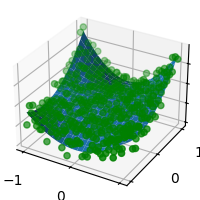

In [7]:

#PLOTTING SAMPLES
plt.style.use('_mpl-gallery')
__,ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(*np.meshgrid(X1,X2), Y_2d, color = "green")
ax.plot_surface(*np.meshgrid(X1,X2), Y_fit,)# alpha=.3)

The objective consists of adjusting the parameters of a model function to best fit a data set. A simple data set consists of n points ${\displaystyle (x_{i},y_{i})\!}$, i = 1, …, n, where  ${\displaystyle x_{i}\!}$ is an independent variable and ${\displaystyle y_{i}\!}$ is a dependent variable whose value is found by observation. The model function has the form ${\displaystyle f(x,{\boldsymbol {\beta }})}$, where m adjustable parameters are held in the vector ${\displaystyle {\boldsymbol {\beta }}}$. The goal is to find the parameter values for the model that "best" fits the data. The fit of a model to a data point is measured by its residual, defined as the difference between the observed value of the dependent variable and the value predicted by the model:

   ${\displaystyle r_{i}=y_{i}-f(x_{i},{\boldsymbol {\beta }}).}$
   <br>

   ${\displaystyle S=\sum _{i=1}^{n}r_{i}^{2}.}$

   <br><br> <br><br>

# Sample correlation coefficient

Given a series of ${\displaystyle n}$ measurements of the pair ${\displaystyle (X_{i},Y_{i})}$ indexed by ${\displaystyle i=1,\ldots ,n}$, the sample correlation coefficient can be used to estimate the population Pearson correlation ${\displaystyle \rho _{X,Y}}$ between ${\displaystyle X}$ and ${\displaystyle Y}$. The sample correlation coefficient is defined as:

   ${\displaystyle r_{xy}\quad {\overset {\underset {\mathrm {def} }{}}{=}}\quad {\frac {\sum \limits _{i=1}^{n}(x_{i}-{\bar {x}})(y_{i}-{\bar {y}})}{(n-1)s_{x}s_{y}}}={\frac {\sum \limits _{i=1}^{n}(x_{i}-{\bar {x}})(y_{i}-{\bar {y}})}{\sqrt {\sum \limits _{i=1}^{n}(x_{i}-{\bar {x}})^{2}\sum \limits _{i=1}^{n}(y_{i}-{\bar {y}})^{2}}}},}$

where ${\displaystyle {\overline {x}}}$ and ${\displaystyle {\overline {y}}}$ are the sample means of  ${\displaystyle X}$ and ${\displaystyle Y}$, and ${\displaystyle s_{x}}$ and ${\displaystyle s_{y}}$ are the corrected sample standard deviations of ${\displaystyle X}$ and ${\displaystyle Y}$.

Equivalent expressions for ${\displaystyle r_{xy}}$ are:

   ${\displaystyle {\begin{aligned}r_{xy}&={\frac {\sum x_{i}y_{i}-n{\bar {x}}{\bar {y}}}{ns'_{x}s'_{y}}}\\[5pt]&={\frac {n\sum x_{i}y_{i}-\sum x_{i}\sum y_{i}}{{\sqrt {n\sum x_{i}^{2}-(\sum x_{i})^{2}}}~{\sqrt {n\sum y_{i}^{2}-(\sum y_{i})^{2}}}}}.\end{aligned}}}$

where ${\displaystyle s'_{x}}$ and ${\displaystyle s'_{y}}$ are the uncorrected sample standard deviations of ${\displaystyle X}$ and ${\displaystyle Y}$.



This calculus could be repeated for each pair of Independent-Dependent variables. In the upper graph we can trace we have 3 variables:  <br>Independent Var = {X,Y, X^2, Y^2, X^3, Y^3...} | Dependent Var = {Z}<br><br>
$R = \begin{pmatrix}
r_{zz} & ...& \\
r_{xz} & r_{xx} & ...\\
r_{yz} & r_{yx} & r_{yy}\\
\end{pmatrix} $

In [8]:
cov = np.corrcoef(Y_fit.flatten(),Y_2d.flatten())